<a href="https://colab.research.google.com/github/RaymondPTrain/ml/blob/master/ManningGanProj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:

!cp "/content/drive/My Drive/model1.h5" /content

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Review model performance, activation layers, miss-classifications

Start with the workflow from project 1.    

Process:

1. Load the data and saved model.
2. Look at the activations.
3. Look at thenlayers.
4. Review the missclassifications.
5. Add Confusion matrix.
6. Classification report.







In [4]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format




This workflow uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


## Import the MNIST dataset

We use the MNIST dataset.

The classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the  MNIST directly from TensorFlow. Import and load the  MNIST data directly from TensorFlow:

In [6]:

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the digit the image represents:


Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [7]:
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

## Explore the data

Let's explore the format of the dataset before testing the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [8]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [9]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [11]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [12]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. Here we inspect some random images to review the data structure.

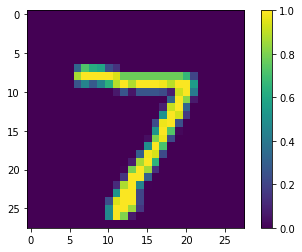

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

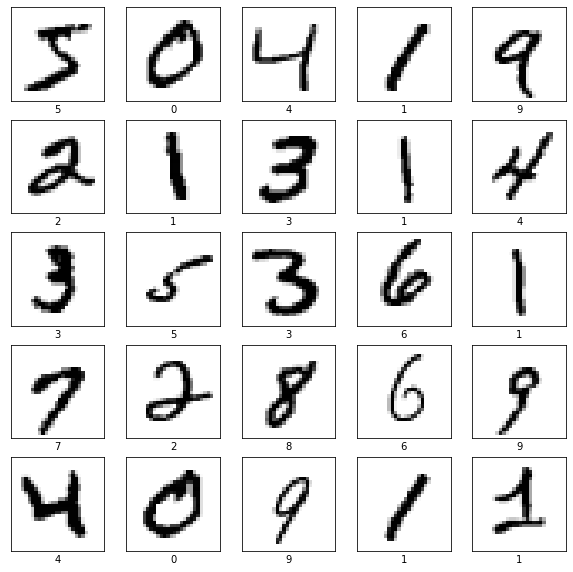

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Load the model and reshape data



### Set up the layers



In [17]:
# Don't need the taining data for this workflow, but JIC we find a use for it
x_train_images = np.expand_dims(train_images, -1)
x_train_images.shape

(60000, 28, 28, 1)

In [18]:
x_test_images = np.expand_dims(test_images, -1)
x_test_images.shape

(10000, 28, 28, 1)

In [19]:
model = keras.models.load_model('drive/My Drive/model1.h5')




### Compile the model 

We have loaded a pre-built model, but keep this step for reference in case we need to re-compile.
Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#Print summary to verify model looks as expected.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## Review the model




### Evaluate accuracy

Next, compare how the model performs on the test dataset:
Should same result we had during training session

In [22]:
test_loss, test_acc = model.evaluate(x_test_images,  test_labels, verbose=2 )

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4774 - accuracy: 0.0988

Test accuracy: 0.09880000352859497


Create activations output

In [23]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


Look at the activations

In [24]:
#activation_model.summary()
activations = activation_model.predict(x_test_images)


In [28]:
len(activations)

8

In [30]:
#Review the layer outputs
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(None, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dropout/cond/Identity:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Identity:0' shape=(None, 128) dtype=float32>]

(10000, 26, 26, 32)


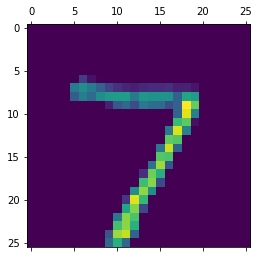

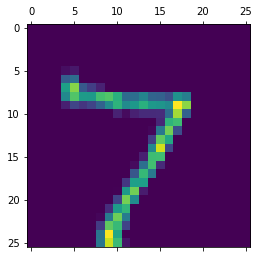

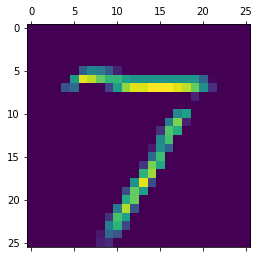

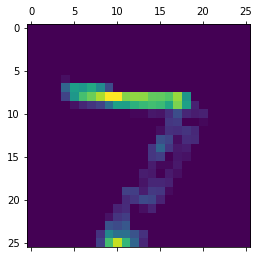

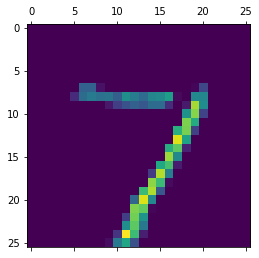

In [31]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

Review the first 3 layers

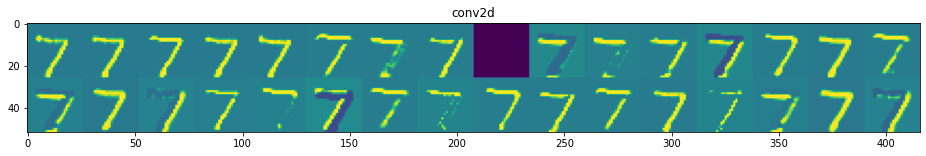

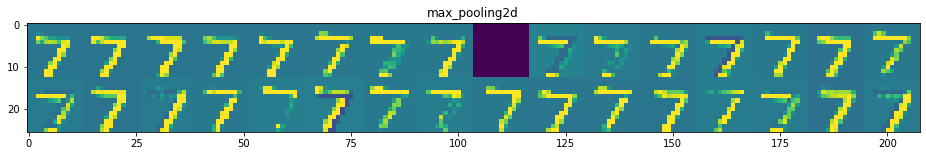

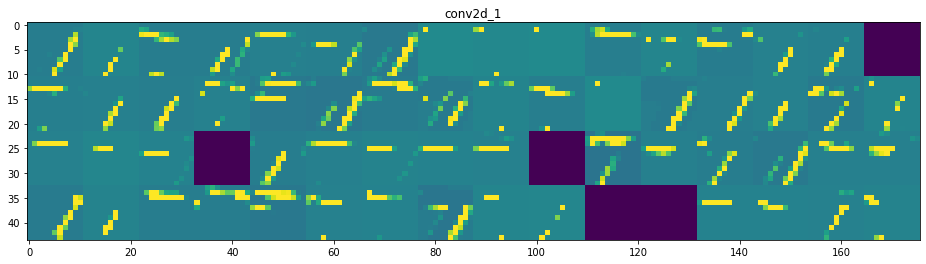

In [33]:
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = int(n_features / images_per_row)
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(x_test_images)

In [36]:
y_pred=model.predict_classes(x_test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
y_pred[100]

6

Here, the model has predicted the label for each image in the testing set. Let's take a look at the some random predictions:

In [38]:
predictions[100]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [39]:
np.argmax(predictions[100])

6

So, the model is most confident that this image is a 6

In [ ]:
test_labels[100]

6

Look at the confusion matrix.    See the outliers.

In [41]:
confusion = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred, num_classes=10)

In [42]:
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    2,    0,    0,    0,    2,    1,    2,    1],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   2,    2, 1023,    0,    2,    0,    0,    2,    1,    0],
       [   0,    0,    6,  986,    0,    5,    0,    7,    6,    0],
       [   1,    3,    0,    0,  969,    0,    2,    0,    1,    6],
       [   2,    2,    1,    7,    0,  859,   13,    1,    3,    4],
       [   4,    3,    0,    0,    1,    1,  947,    0,    2,    0],
       [   0,    9,   10,    2,    0,    0,    0, 1004,    0,    3],
       [   5,    3,    1,    0,    2,    0,    0,    2,  957,    4],
       [   3,    7,    1,    1,    3,    1,    0,    6,    1,  986]],
      dtype=int32)>

In [44]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({}) {} ".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label],i),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Find the specific items that the network had trouble with.

Looking at these results:


1.   Some appear to be mislabeled
2.   Some are difficult to identify visually
3.   Some can be identified visually but have odd characterizations.



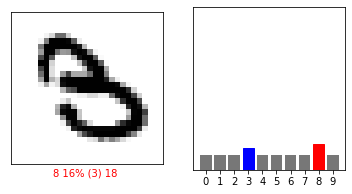

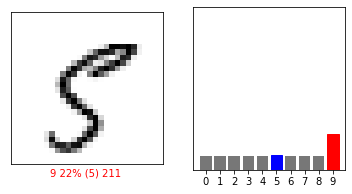

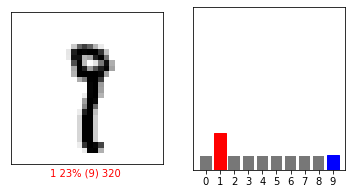

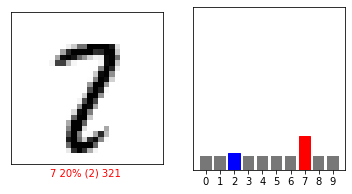

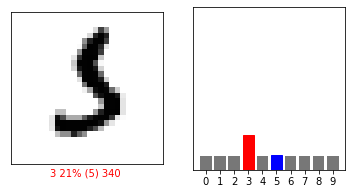

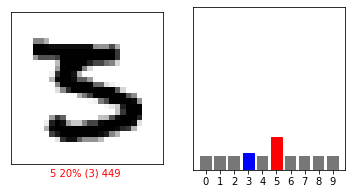

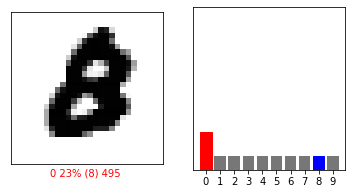

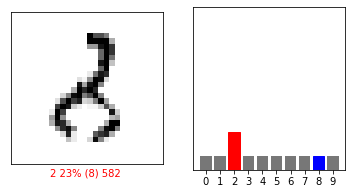

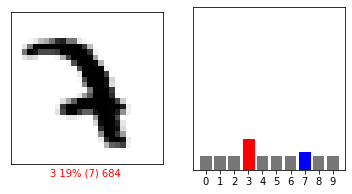

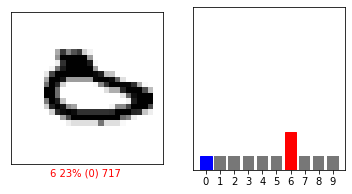

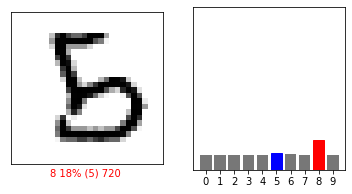

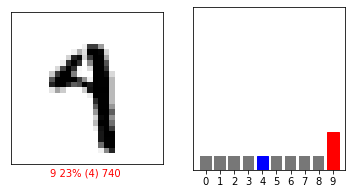

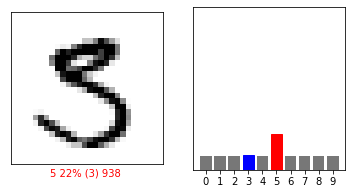

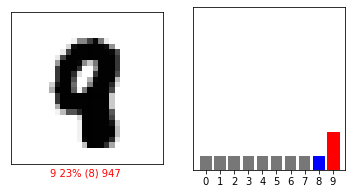

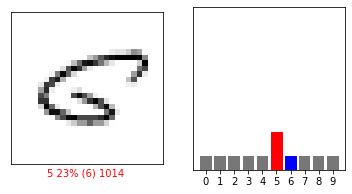

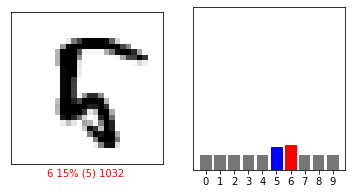

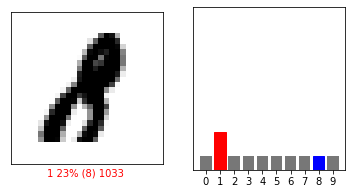

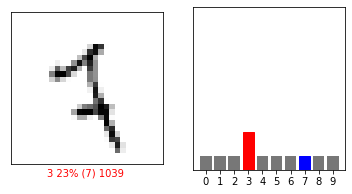

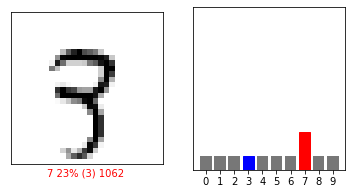

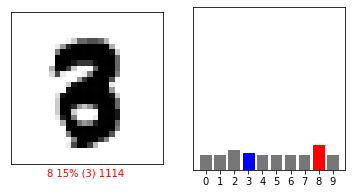

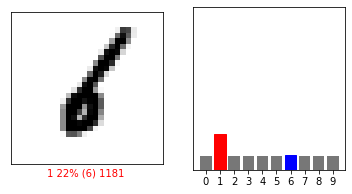

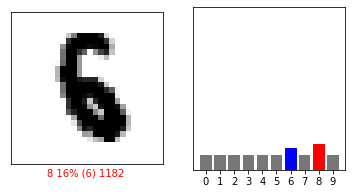

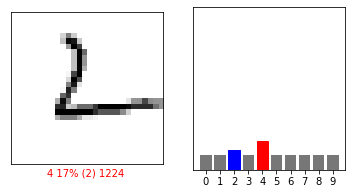

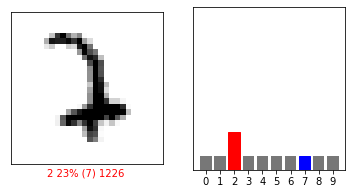

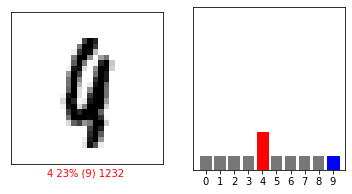

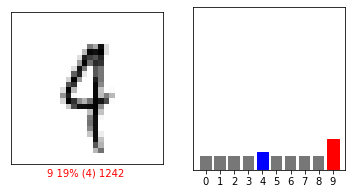

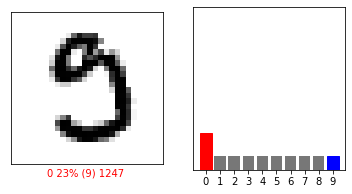

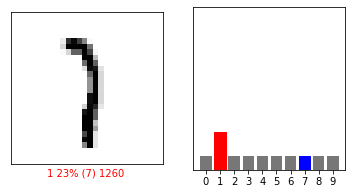

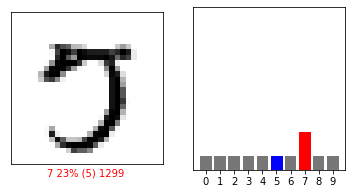

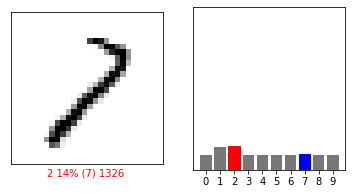

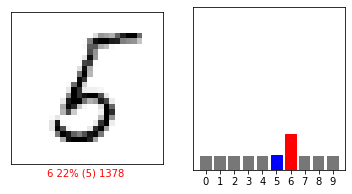

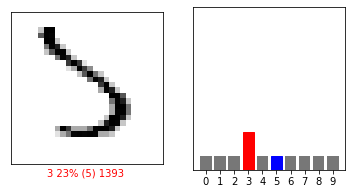

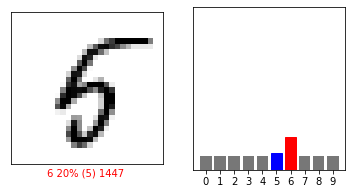

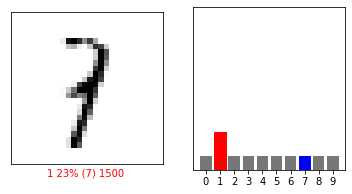

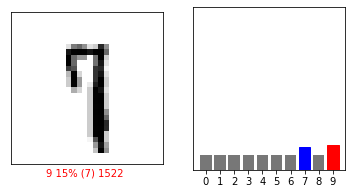

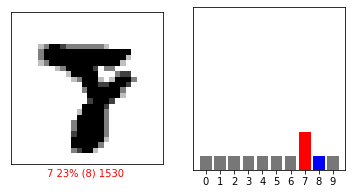

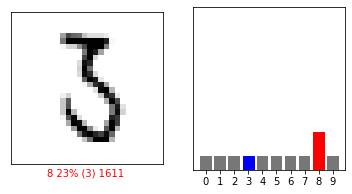

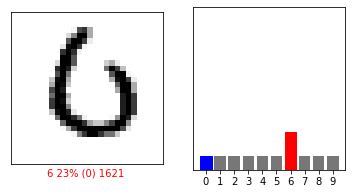

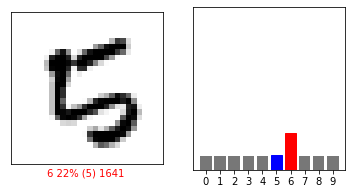

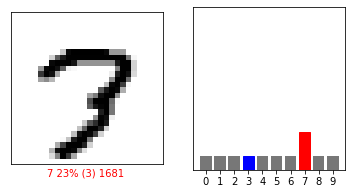

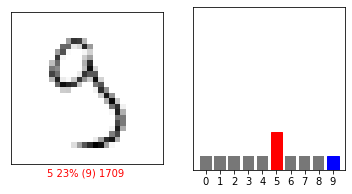

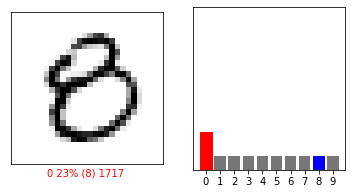

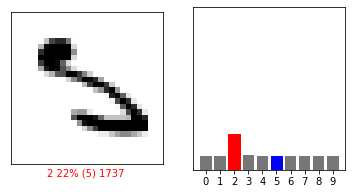

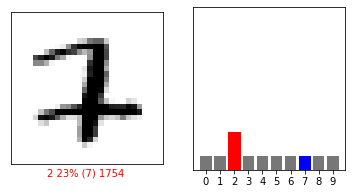

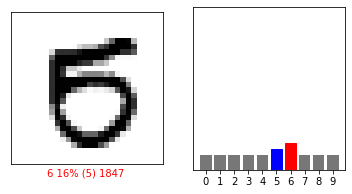

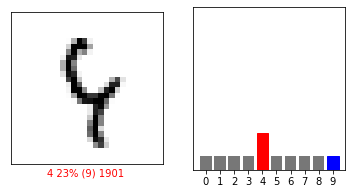

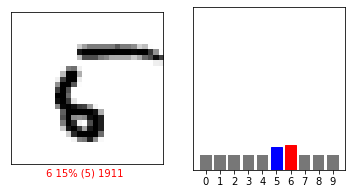

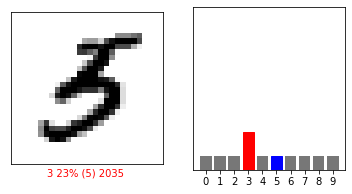

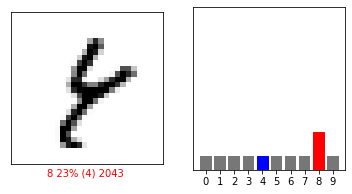

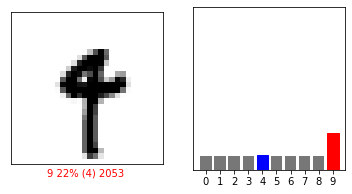

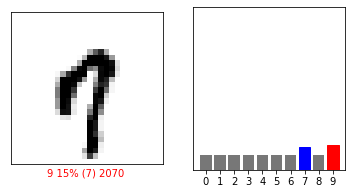

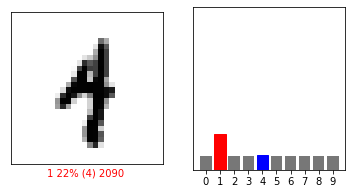

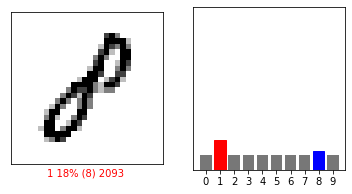

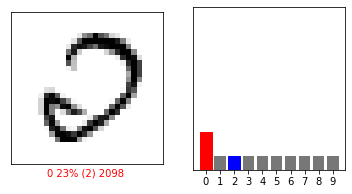

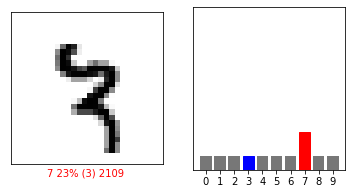

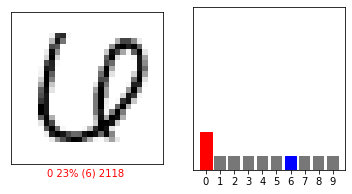

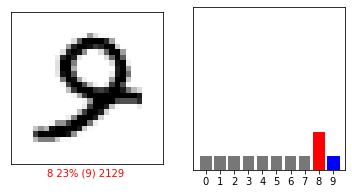

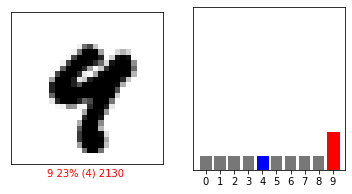

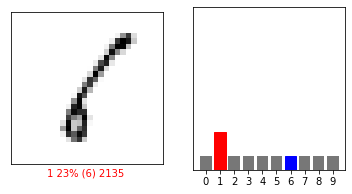

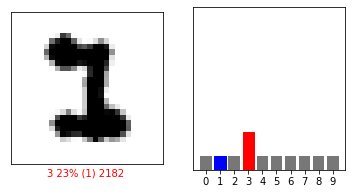

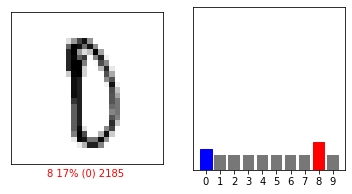

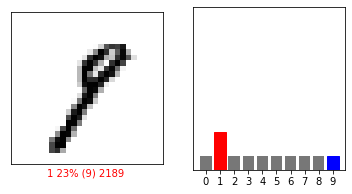

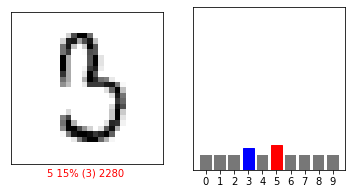

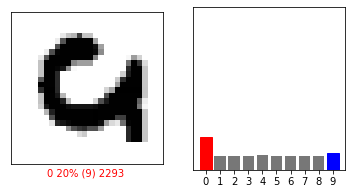

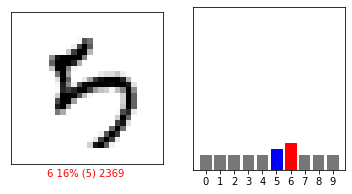

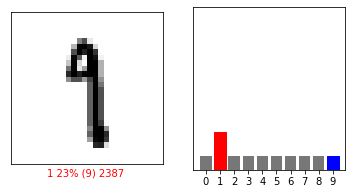

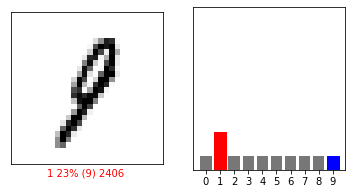

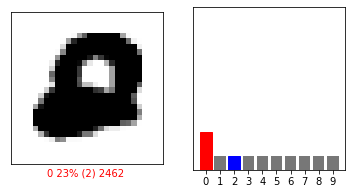

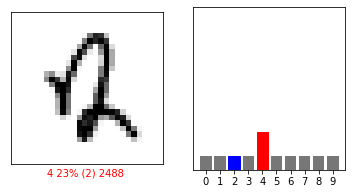

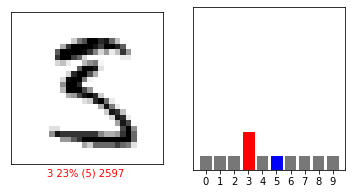

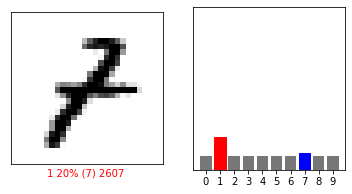

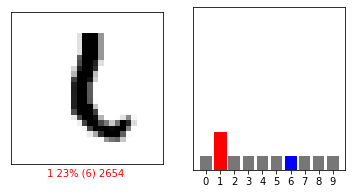

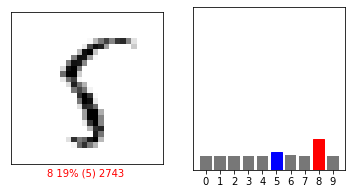

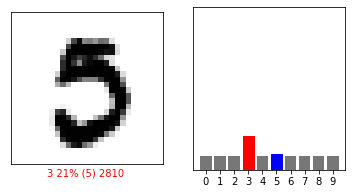

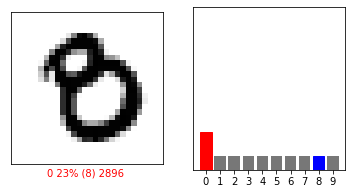

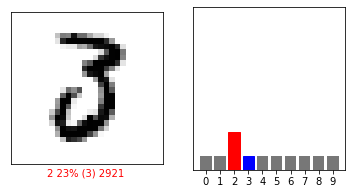

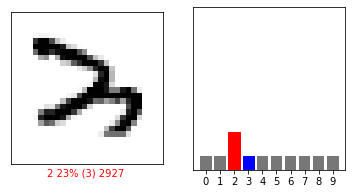

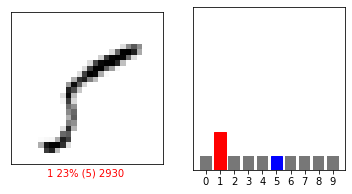

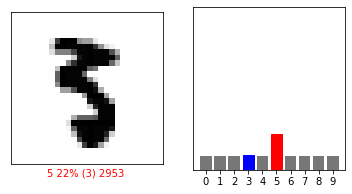

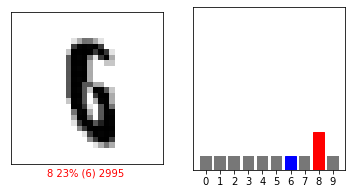

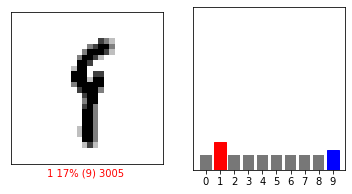

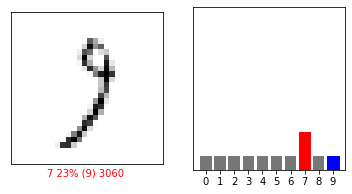

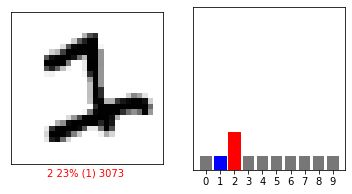

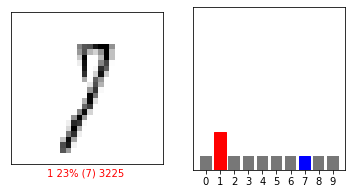

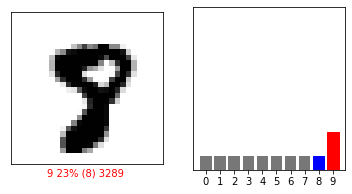

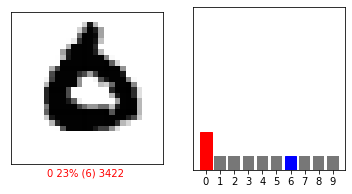

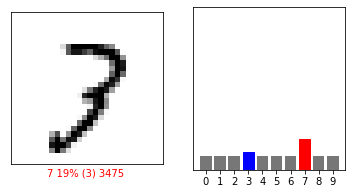

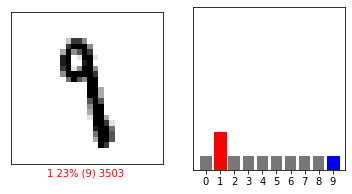

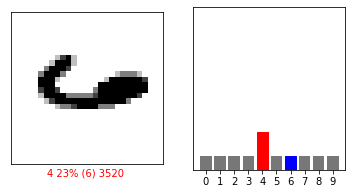

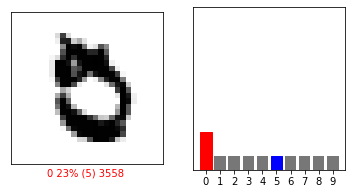

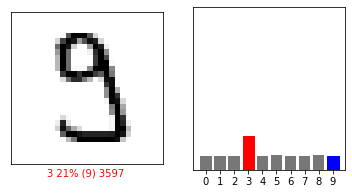

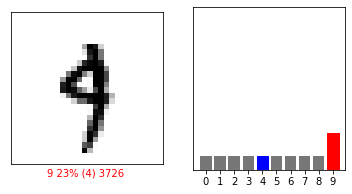

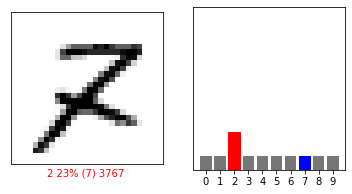

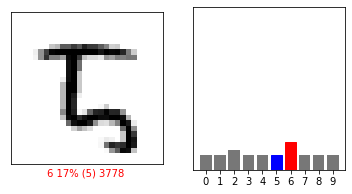

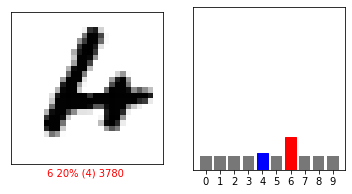

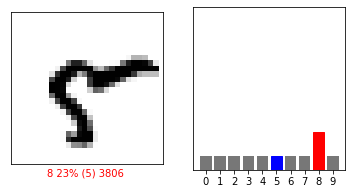

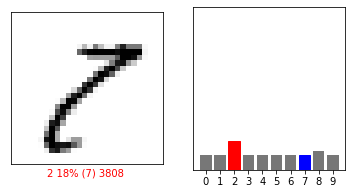

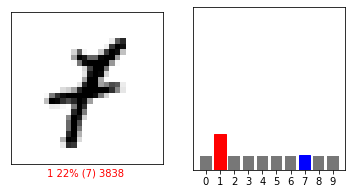

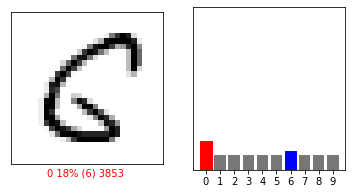

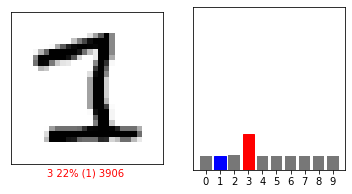

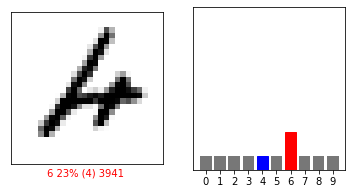

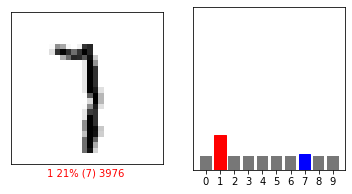

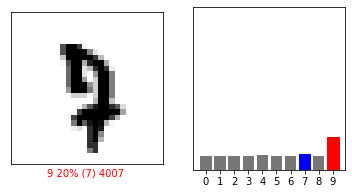

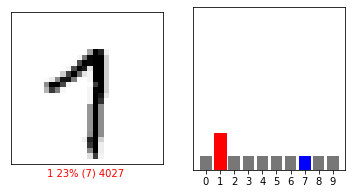

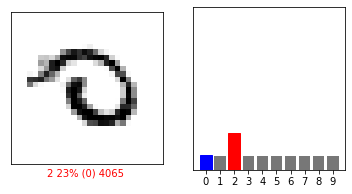

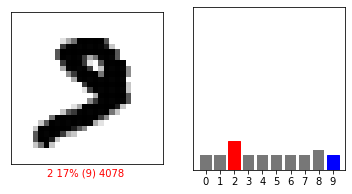

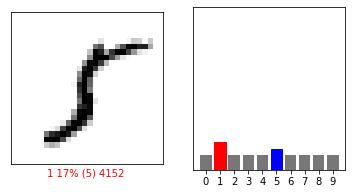

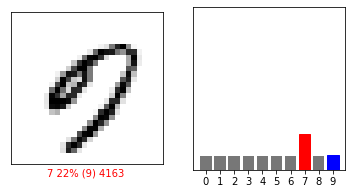

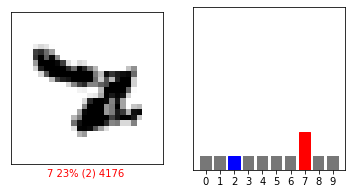

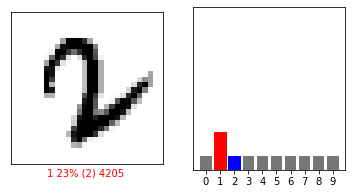

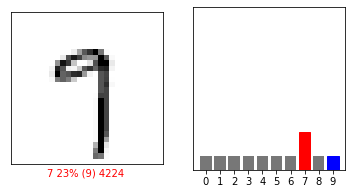

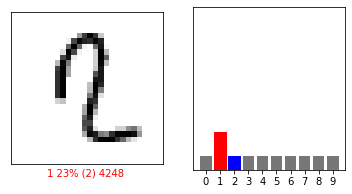

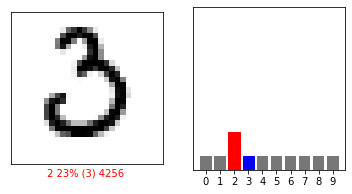

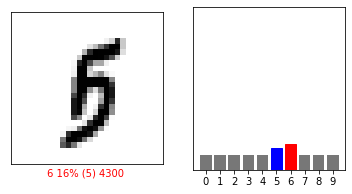

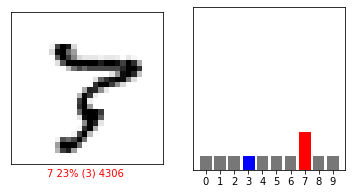

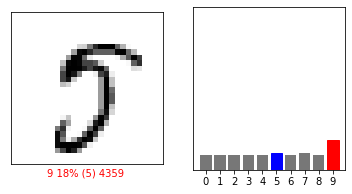

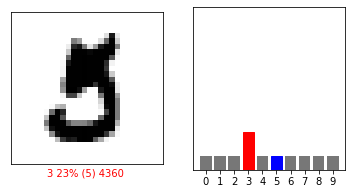

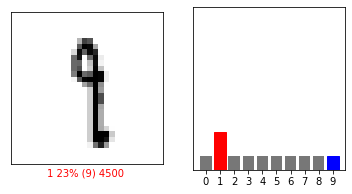

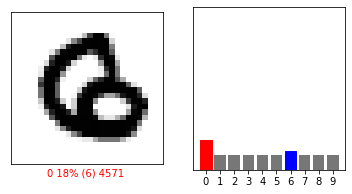

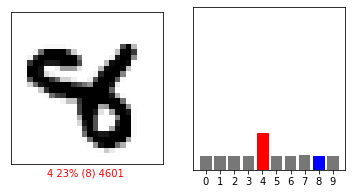

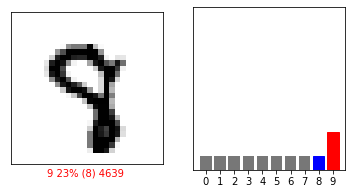

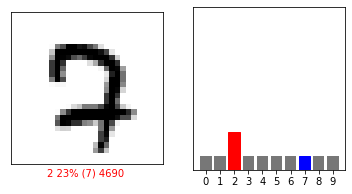

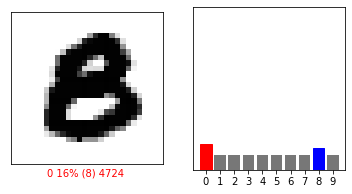

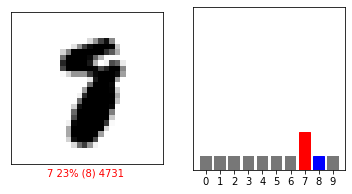

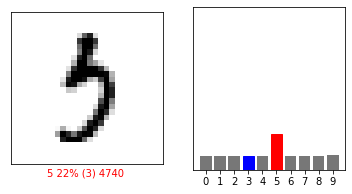

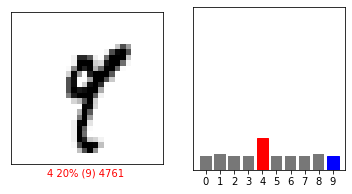

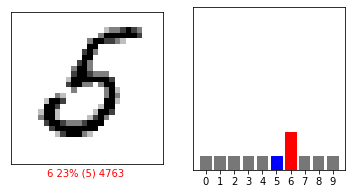

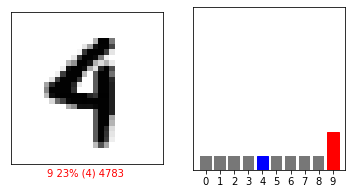

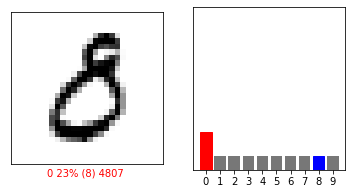

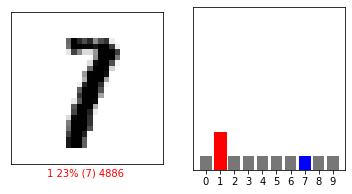

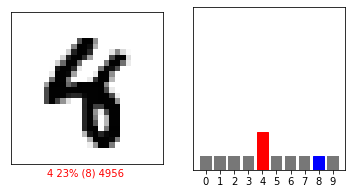

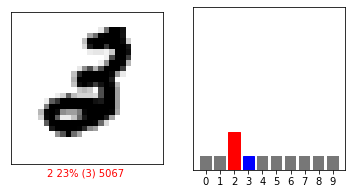

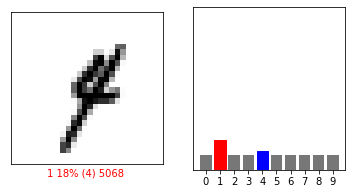

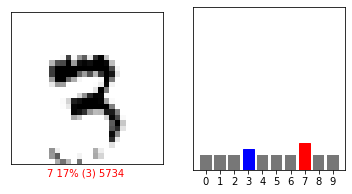

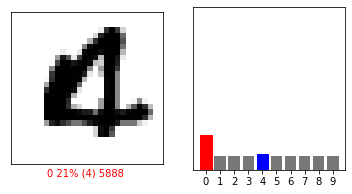

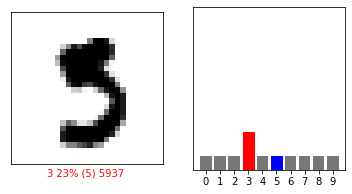

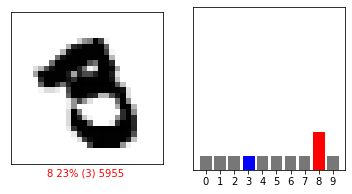

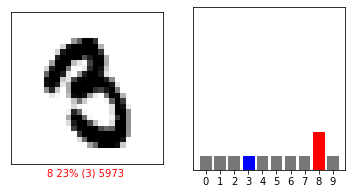

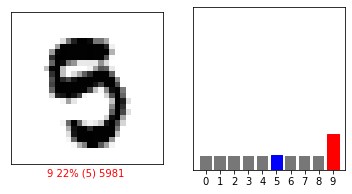

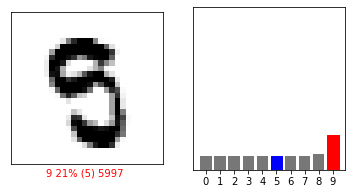

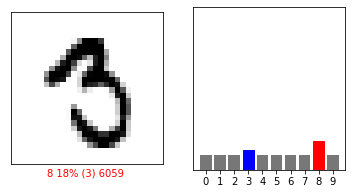

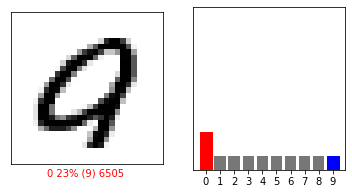

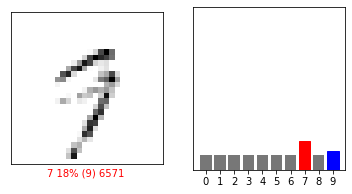

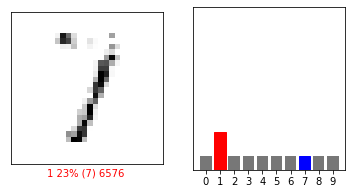

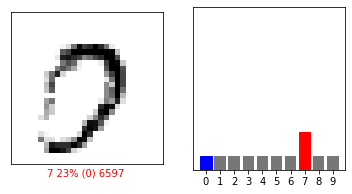

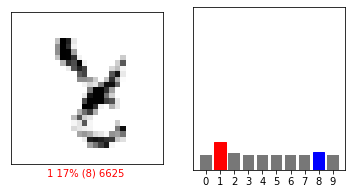

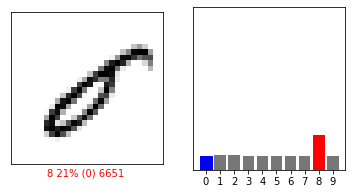

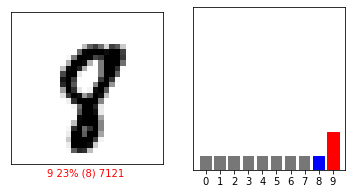

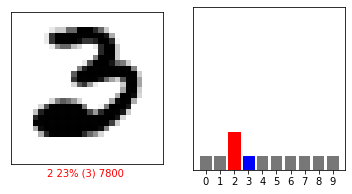

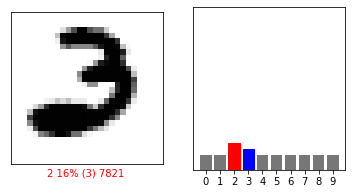

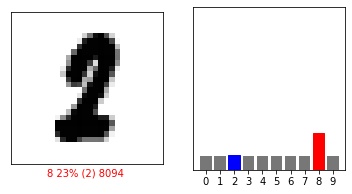

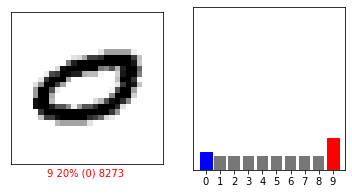

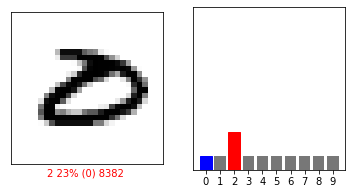

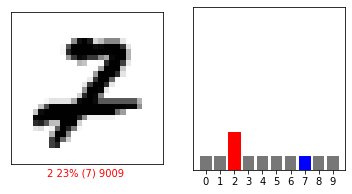

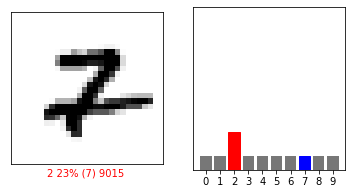

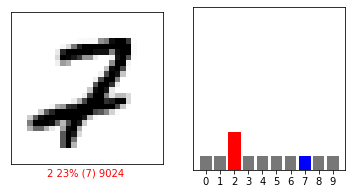

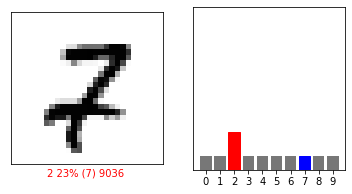

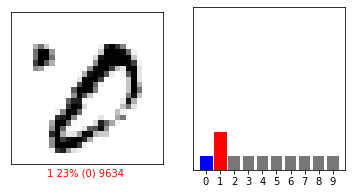

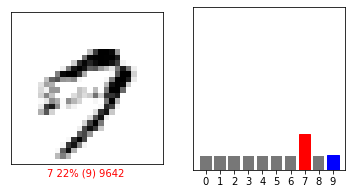

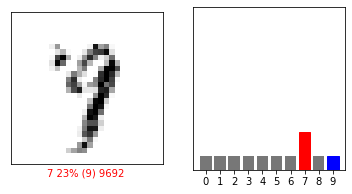

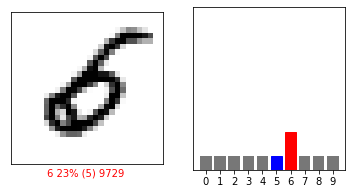

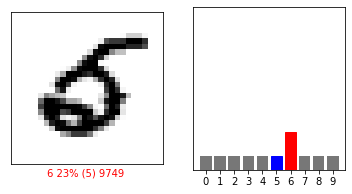

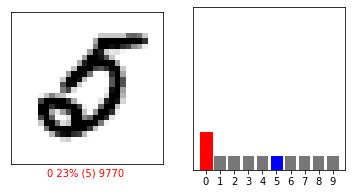

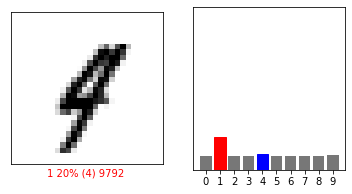

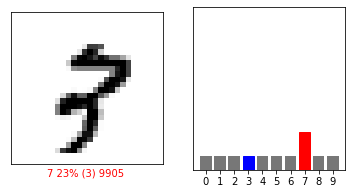

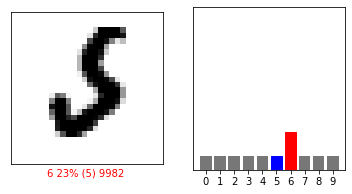

166


In [46]:
j = 0
for i in range(len(y_pred)):
  if y_pred[i] != test_labels[i]:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
#   print(y_pred[i],test_labels[i])
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(1,2,2)    
    plot_value_array(i,predictions[i],test_labels)
#    plt.imshow(test_images[i])
    plt.show()
    j += 1
print(j)

In [ ]:
test_images[0].shape

Lets try the report from sklearn

In [48]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_images, batch_size=64, verbose=1)

y_pred_bool = np.argmax(y_pred, axis=1)
#y_pred_bool
print(classification_report(test_labels,y_pred_bool))

157/157 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Summary

Many of the images that give the network trouble are outliers.
There are some variations of 7,9 and 1 that the network missed.  In some case the images are mislabeled.
Loops which are incomplete or mishapen cause some mislabeling.
